In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv(r"C:/Users/LENOVE/Desktop/Machine Learning/Datasets/loan.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
dataset.shape

(614, 13)

In [56]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
dataset.isnull().sum().sum()

136

In [58]:
dataset.shape[0]

614

In [59]:
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               0.000000
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [60]:
(dataset.isnull().sum()/dataset.shape[0]*dataset.shape[0])*100

Loan_ID                 0.0
Gender                  0.0
Married               300.0
Dependents           1500.0
Education               0.0
Self_Employed        3200.0
ApplicantIncome         0.0
CoapplicantIncome       0.0
LoanAmount           2200.0
Loan_Amount_Term     1400.0
Credit_History       5000.0
Property_Area           0.0
Loan_Status             0.0
dtype: float64

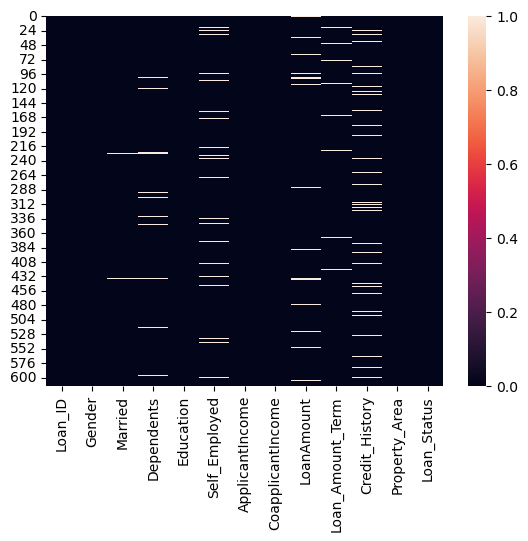

In [61]:
sns.heatmap(dataset.isnull())
plt.show()

In [62]:
dataset.notnull().sum()

Loan_ID              614
Gender               614
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [63]:
dataset.notnull().sum().sum()

7846

In [64]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

1.7038336256577298

In [65]:
# dataset.dropna(inplace=True)

In [66]:
dataset["Gender"].mode()[0]

'Male'

Filling Missing Values of Categorical Data

In [67]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace = True)

In [73]:
dataset.select_dtypes(include="object").isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [75]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace = True)

C:\Users\LENOVE\AppData\Local\Temp\ipykernel_6972\1404094849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace = True)


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
from sklearn.impute import SimpleImputer

In [85]:
dataset.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [89]:
si = SimpleImputer(strategy="mean")
dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = si.fit_transform(
    dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
)

In [91]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [92]:
dataset.to_csv(r"C:/Users/LENOVE/Desktop/Machine Learning/Datasets/loan_cleaned.csv", index=False)

In [93]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [94]:
dataset.isnull().sum().sum()

0